#Importing libs and opening MNIST

In [19]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy import stats
np.random.seed(42)

In [20]:
with open('mnist_5.csv', 'r', encoding = 'utf-8') as f:
    mnist5 = np.genfromtxt(f, dtype = float, delimiter = ',')

In [21]:
mnist5n = mnist5/255

## Defining Funcs

In [22]:
def PPCA_EM(dataset: np.ndarray, L: int):
    D = dataset.shape[1]
    N = dataset.shape[0]
    W = np.ones((D, L))
    mean = np.mean(dataset, axis = 0)
    std = 1
    for i in range(10):
        M = (W.T @ W) + std*(np.eye(L))
        Minv = np.linalg.inv(M)
        Ez = np.apply_along_axis(lambda xi: Minv @ W.T @ (xi - mean), axis = 1, arr = dataset)
        Ezz = np.apply_along_axis(lambda Ezi: (std * Minv) + Ezi @ Ezi.T, axis = 1, arr = Ez)
        W = np.sum(np.array([(dataset[i] - mean).reshape((-1, 1)) @ Ez[i].reshape(1, -1) for i in range(N)]), axis = 0) @ np.linalg.inv(np.sum(Ezz, axis = 0))
        std = (1/N*D) * np.sum(np.array([((dataset[i] - mean) @ (dataset[i] - mean)) - (2 * Ez[i].T @ W.T @ (dataset[i] - mean) + np.trace(Ezz[i] @ W.T @ W))]))
    return mean, std, W, M

In [23]:
def plotimage(array, normalized = True):
    if normalized:
        array = array*255
    array = array.reshape((28,28)).astype(np.uint8)
    img = Image.fromarray(array, 'L')
    plt.imshow(img)
    plt.show()

In [24]:
def Inf_Gauss1D(data: np.ndarray):
    N = data.shape[0]
    mean0 = 0
    k0 = 1
    a0 = 1
    b0 = 1
    meanN = ((k0*mean0) + np.sum(data))/(k0 + N)
    aN = a0 + ((N+1)/2)
    kN = k0
    bN = b0
    for i in range(20):
        kN = (k0 + N)*aN/bN
        bN = b0 + (k0*((1/kN)+((meanN - mean0)**2))/2) + ((1/2)*np.sum(((data - meanN)**2)+(1/kN)))
    return meanN, kN, aN, bN

# Executing Algo

In [25]:
values = [2, 10, 20, 50, 100]
lmean = []
lstd = []
lW = []
lMinv = []
for v in values:
    tempmean, tempstd, tempW, tempMinv = PPCA_EM(mnist5n, v)
    lmean.append(tempmean)
    lstd.append(tempstd)
    lW.append(tempW)
    lMinv.append(tempMinv)

In [26]:
datasetsz = []
datasetsr = []
for i, v in enumerate(values):
    datasetsz.append(np.apply_along_axis(lambda xi: lMinv[i] @ lW[i].T @ (xi - lmean[i]), axis = 1, arr = mnist5n))
    datasetsr.append(np.apply_along_axis(lambda zi: lW[i]@zi + lmean[i], axis = 1, arr = datasetsz[i]))

In [27]:
L2 = datasetsr[0]
L10 = datasetsr[1]
L20 = datasetsr[2]
L50 = datasetsr[3]
L100 = datasetsr[4]
choice = [50, 500, 5000, 5500]

-.Real


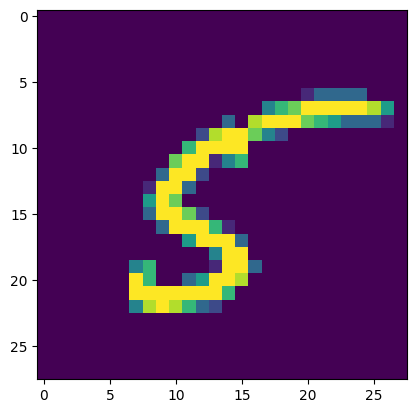


-.2


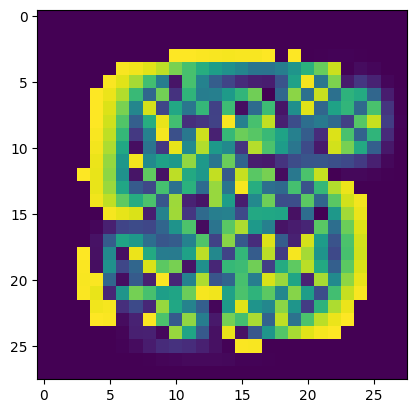


-.10


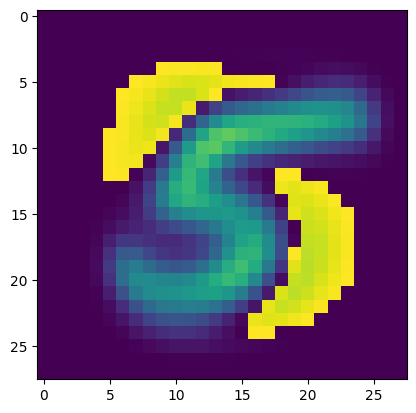


-.20


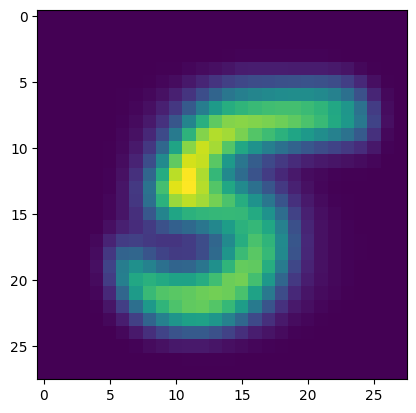


-.50


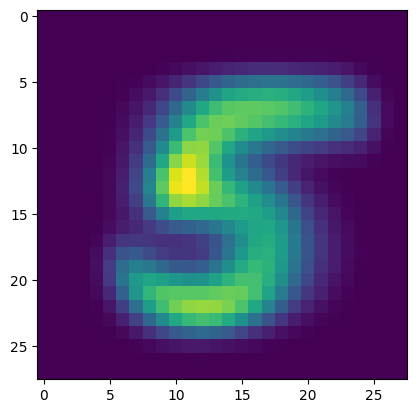


-.100


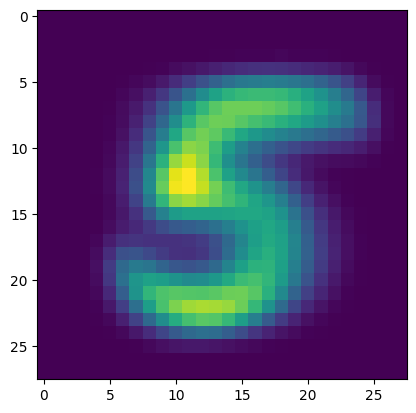


-.Real


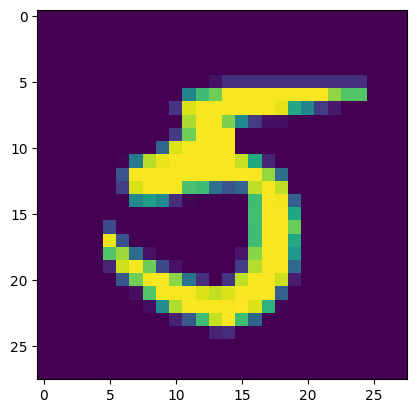


-.2


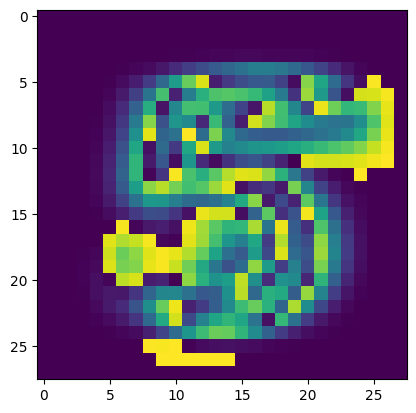


-.10


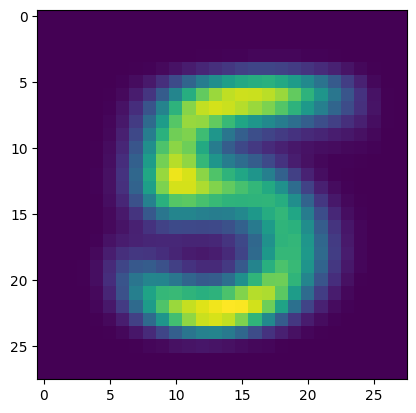


-.20


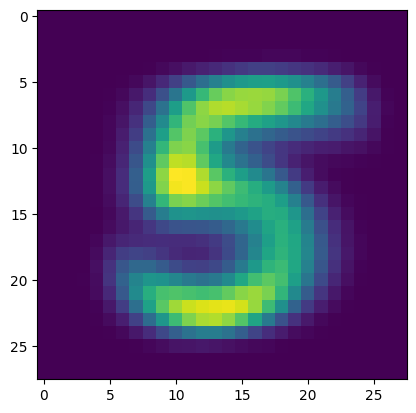


-.50


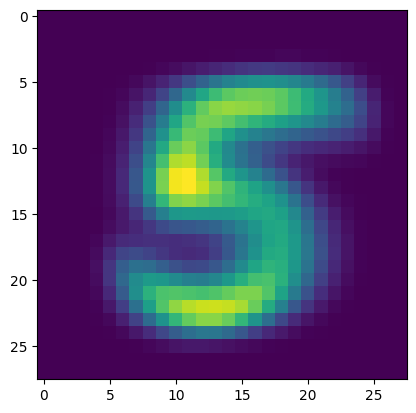


-.100


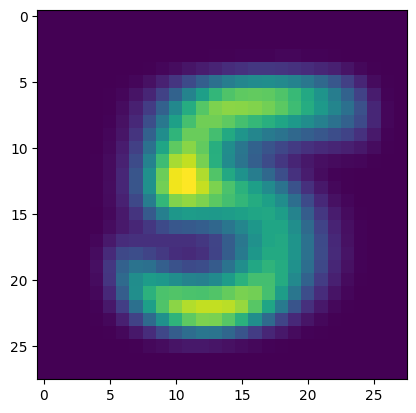


-.Real


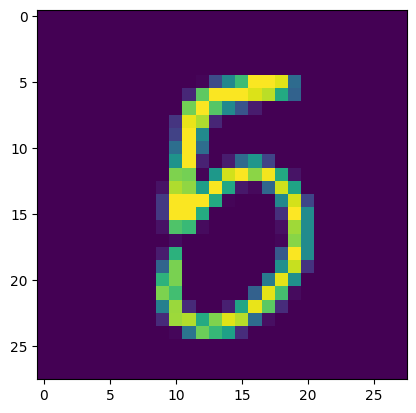


-.2


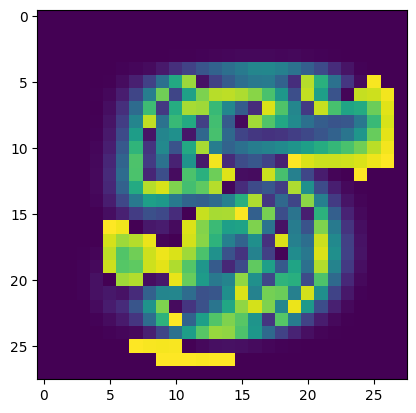


-.10


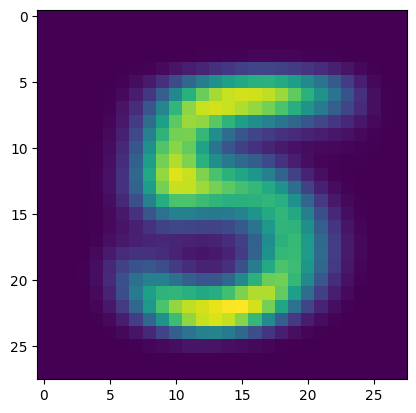


-.20


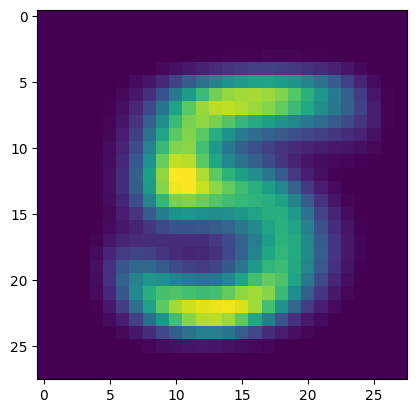


-.50


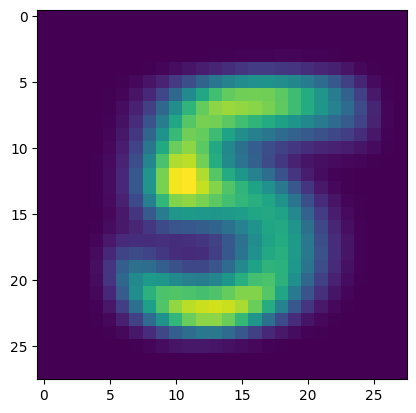


-.100


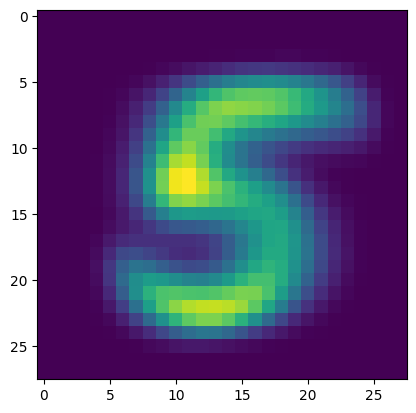


-.Real


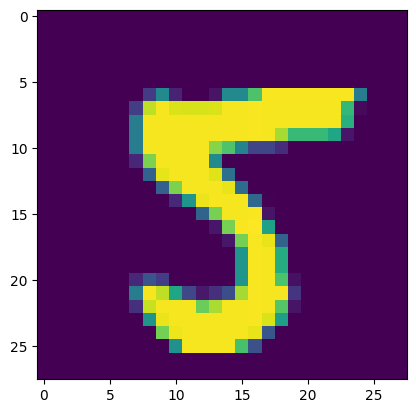


-.2


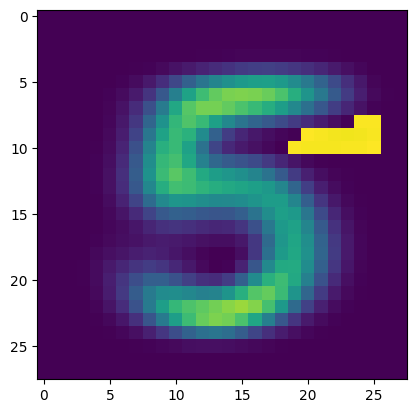


-.10


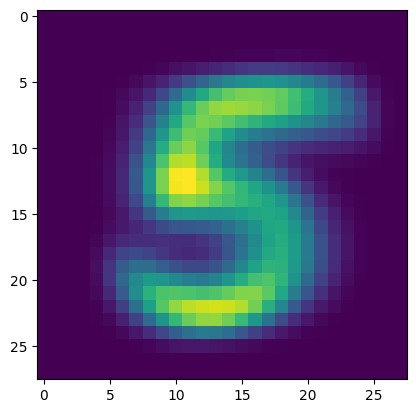


-.20


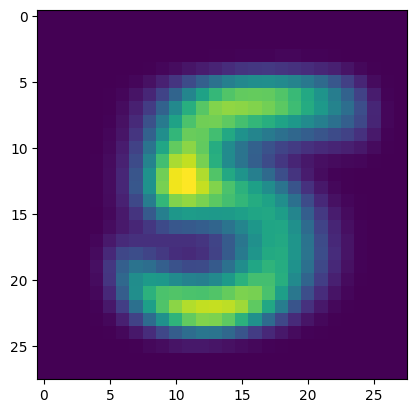


-.50


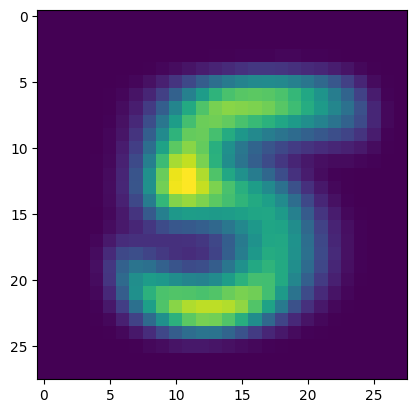


-.100


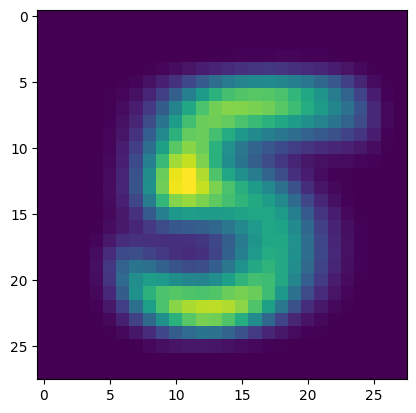

In [28]:
for i in choice:
    print("-.Real")
    plotimage(mnist5[i], normalized = False)
    print()
    print("-.2")
    plotimage(L2[i])
    print()
    print("-.10")
    plotimage(L10[i])
    print()
    print("-.20")
    plotimage(L20[i])
    print()
    print("-.50")
    plotimage(L50[i])
    print()
    print("-.100")
    plotimage(L100[i])
    print()


Imagem reconstruída de amostra no espaço projetado: 2


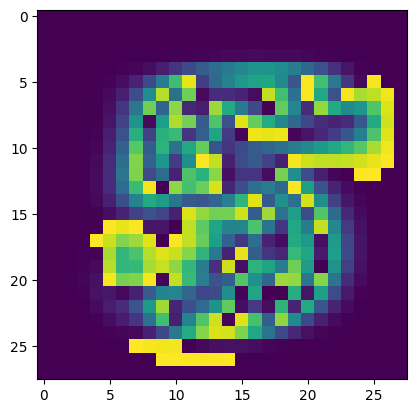


Imagem reconstruída de amostra no espaço projetado: 10


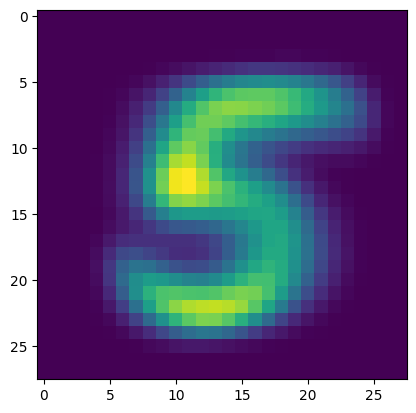


Imagem reconstruída de amostra no espaço projetado: 20


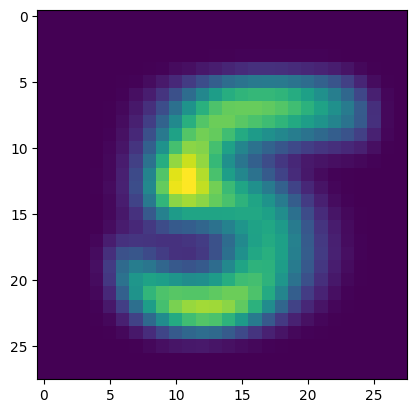


Imagem reconstruída de amostra no espaço projetado: 50


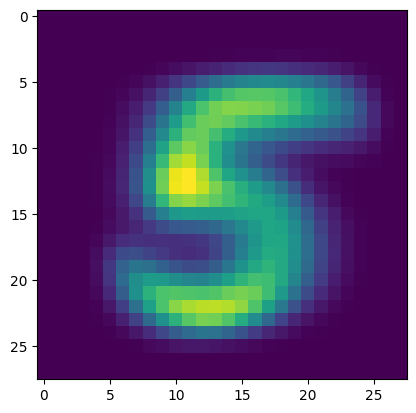


Imagem reconstruída de amostra no espaço projetado: 100


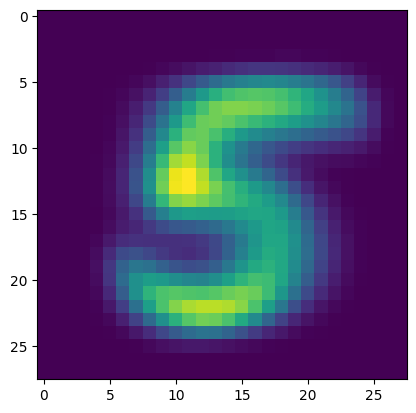

In [29]:
for i in range(5):
    sample = np.min(datasetsz[i], axis = 0) + (np.random.rand(values[i]) * (np.max(datasetsz[i], axis = 0) - np.min(datasetsz[i], axis = 0)))
    reconstructed = lW[i] @ sample + lmean[i]
    print()
    print(f"Imagem reconstruída de amostra no espaço projetado: {values[i]}")
    plotimage(reconstructed)

In [30]:
gaussian1d = np.genfromtxt("gaussian_1d.csv")

In [31]:
N = [10, 50, 100, None]

Dados: 10
Média:


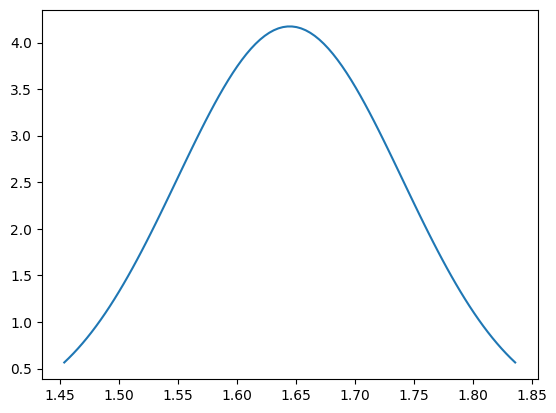

Valor esperado: 1.6449303006811198
T:


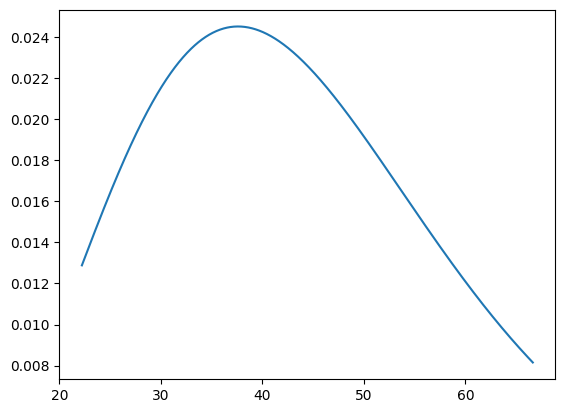

Valor esperado: 44.42806874166755

Dados: 50
Média:


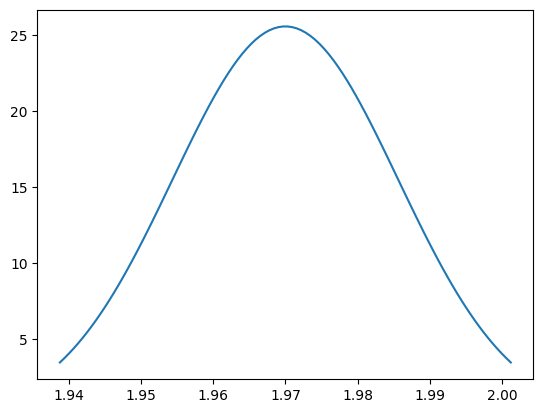

Valor esperado: 1.969984633320061
T:


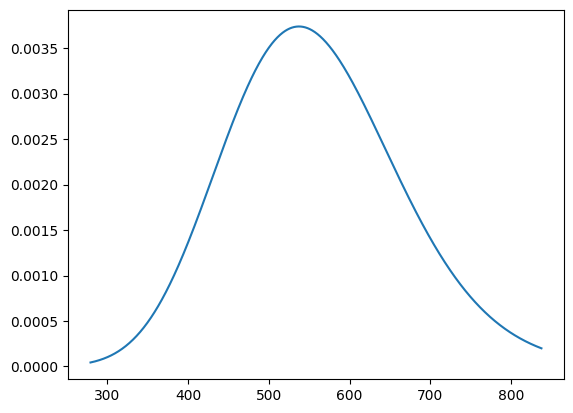

Valor esperado: 558.2687255577805

Dados: 100
Média:


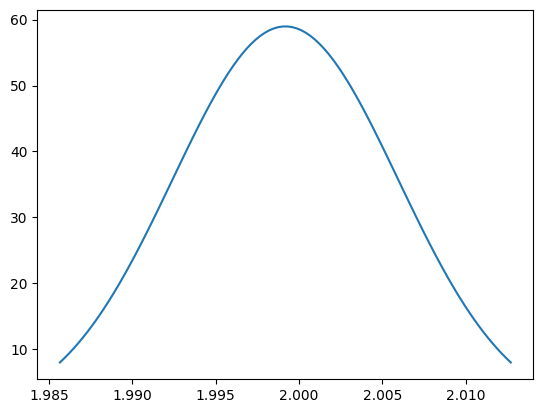

Valor esperado: 1.999177237323483
T:


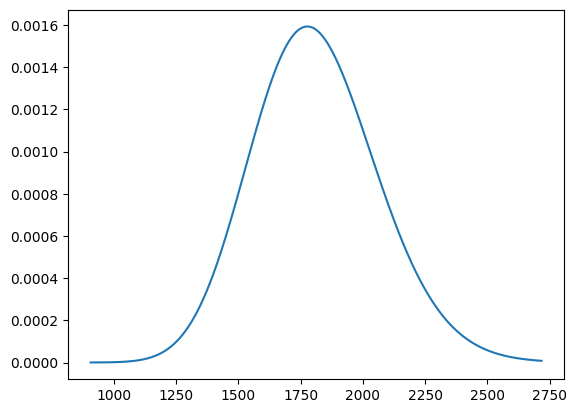

Valor esperado: 1811.92891345465

Dados completos
Média:


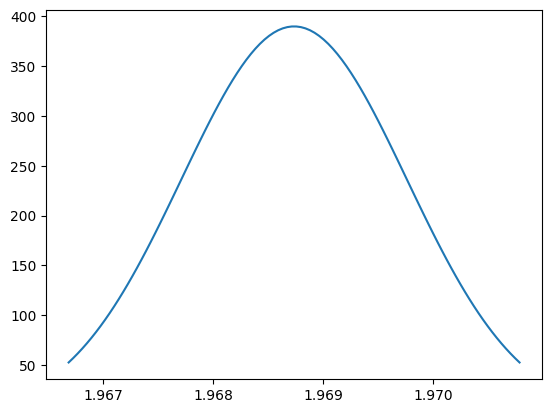

Valor esperado: 1.9687371100567022
T:


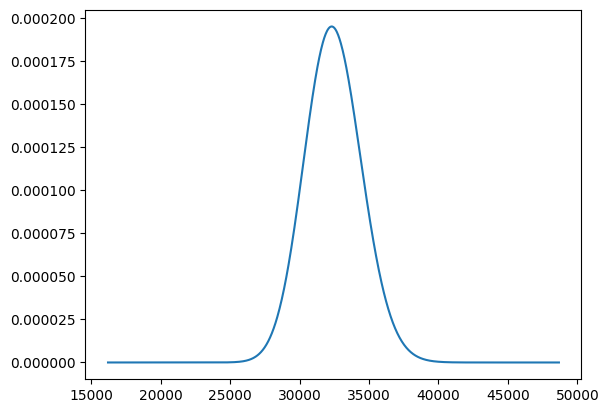

Valor esperado: 32443.57469002399



In [32]:
for i in N:
    currentdata = gaussian1d[:i]
    mean, k, a, b = Inf_Gauss1D(currentdata)
    sigma = (1/k)
    if i:
        print(f"Dados: {i}")
    else:
        print("Dados completos")
    print("Média:")
    mean_dist = stats.norm(loc = mean, scale = sigma)
    x = np.linspace(mean - 2*sigma, mean + 2*sigma, 100)
    y = mean_dist.pdf(x)
    plt.plot(x, y)
    plt.show()
    print(f"Valor esperado: {mean}")
    print("T:")
    t_dist = stats.gamma(a = a, scale = b)
    exp_t = t_dist.expect()
    x = np.linspace(exp_t - (exp_t/2), exp_t + (exp_t/2), 1000)
    y = t_dist.pdf(x)
    plt.plot(x, y)
    plt.show()
    print(f"Valor esperado: {exp_t}")
    print()